In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')

In [216]:
df = pd.read_csv('zoo.csv')
df2 = pd.read_csv('class.csv')

In [217]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [218]:
df.tail()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [219]:
df2

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [220]:
# Function to check if a row satisfies the constraints
def check_constraints(row):
    # Feather Constraint: Birds have feathers
    if row['class_type'] == 2:
        if row['feathers'] != 1:
            return -1

    # Egg Constraint: Bird, Fish, Amphibian lay egg
    if row['class_type'] in [2, 4, 5]:
        if row['eggs'] != 1:
            return -1

    # Milk Constraint: Mammal gives milk
    if row['class_type'] == 1:
        if row['milk'] != 1:
            return -1

    # Aquatic Constraint: Fishes are always aquatic
    if row['class_type'] == 4:
        if row['aquatic'] != 1:
            return -1

    # Leg Constraint: Birds have 2 legs
    if row['class_type'] == 2:
        if row['legs'] != 2:
            return -1

    # Tooth Constraint: Fish don't have teeth
    if row['class_type'] == [4]:
        if row['toothed'] != 1:
            return -1

    # Backbone Constraint: Mammal, Bird, Reptile and Fish don't have backbone
    if row['class_type'] in [1, 2, 3, 4]:
        if row['backbone'] != 1:
            return -1
            
    # Breathe Constraint: Fishes use gills instead of lungs to breath
    if row['class_type'] == [4]:
        if row['breathes'] == 1:
            return -1

    # Fin Constraint: Fish have fins
    if row['class_type'] == [4]:
        if row['fins'] != 1:
            return -1

    # Leg Constraint: Insects have 6 legs
    if row['class_type'] == [6]:
        if row['legs'] != 6:
            return -1

    # Leg Constraint: Amphibian have 4 legs
    if row['class_type'] == [5]:
        if row['legs'] != 4:
            return -1

    # If all constraints are satisfied, return True
    return 1

In [221]:
# Apply the constraint check to each row
df['valid'] = df.apply(check_constraints, axis=1)

# Show rows that fail the constraints
invalid_rows = df[df['valid'] == -1]
invalid_rows

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,valid


In [222]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a copy of the dataset and randomly mutate 10% of the rows
df_mutated = df.copy()
num_mutations = int(0.1 * len(df))  # Mutate 10% of rows
mutation_indices = np.random.choice(df.index, size=num_mutations, replace=False)

# Mutate by adding large random
df_mutated.loc[mutation_indices, 'class_type'] = 2
df_mutated.loc[mutation_indices, 'legs'] = np.random.uniform(5, 4, size=num_mutations)

# Ground truth: Now, we assume the mutated rows are invalid (-1), others are valid (1)
y_true = np.ones(len(df), dtype=int)  # Default all rows as valid (1)
y_true[mutation_indices] = -1         # Mark mutated rows as invalid (-1)

# Predictions: Based on our constraint checks
y_pred = df_mutated.apply(check_constraints, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, pos_label=1)
recall = recall_score(y_true, y_pred, pos_label=1)
f1 = f1_score(y_true, y_pred, pos_label=1)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [223]:
# Print the first 20 ground truth labels
print(y_true[:20])

# Print the first 20 predicted labels
print(y_pred[:20])

[ 1  1  1  1  1  1 -1  1  1 -1  1  1 -1  1  1  1  1  1  1  1]
0     1
1     1
2     1
3     1
4     1
5     1
6    -1
7     1
8     1
9    -1
10    1
11    1
12   -1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
dtype: int64


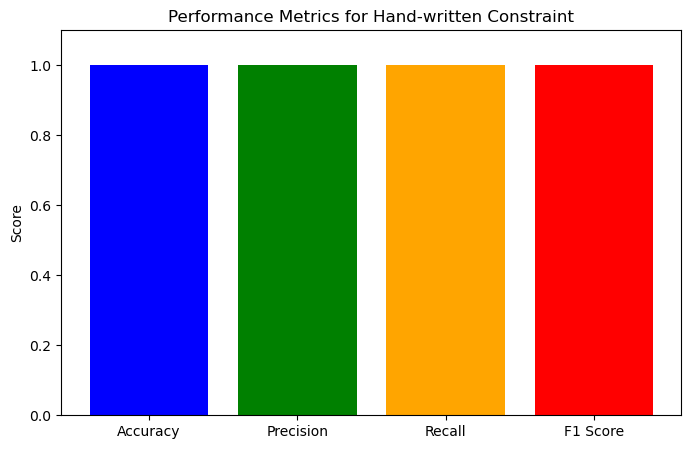

In [224]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Plot the metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1.1)  # Set y-axis limits from 0 to 1.1
plt.title('Performance Metrics for Hand-written Constraint')
plt.ylabel('Score')
plt.show()

Unique values in y_true: [-1  1]
Unique values in y_pred: [-1  1]


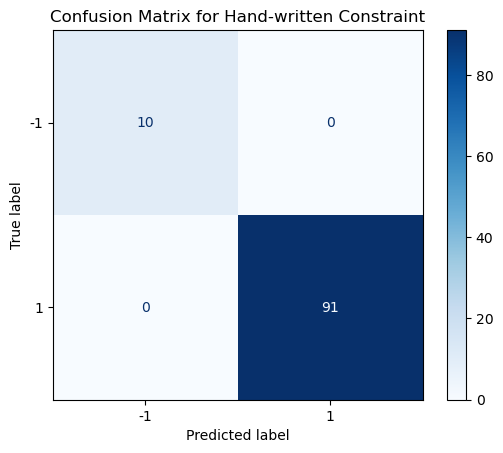

In [225]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Check the unique values in y_true and y_pred
print(f"Unique values in y_true: {np.unique(y_true)}")
print(f"Unique values in y_pred: {np.unique(y_pred)}")

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Handle case where only one class is present
if len(np.unique(y_true)) == 1 or len(np.unique(y_pred)) == 1:
    # Only one class in ground truth or predictions
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
else:
    # Both classes are present
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 1])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Hand-written Constraint')
plt.show()